In [1]:
 %matplotlib inline
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# первый класс
np.random.seed(7)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

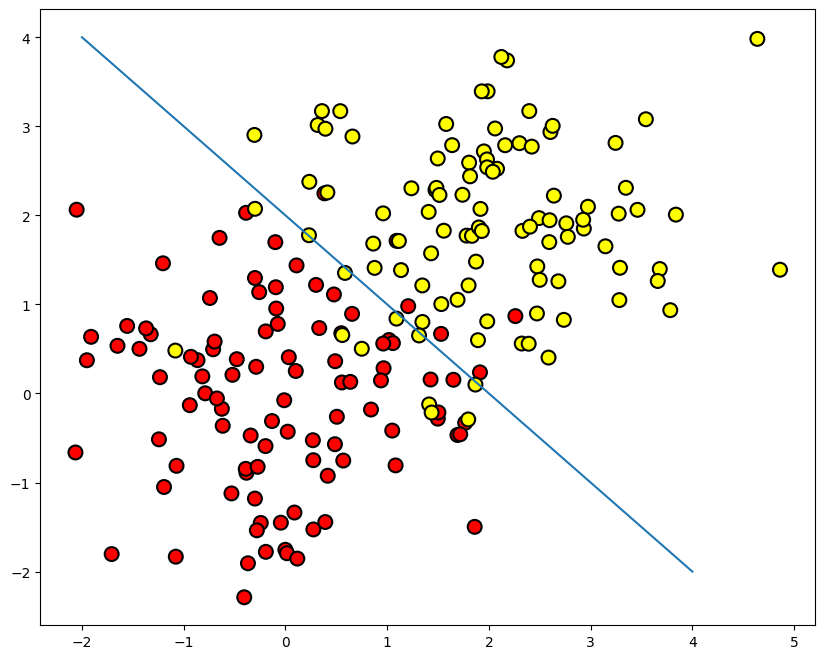

In [3]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

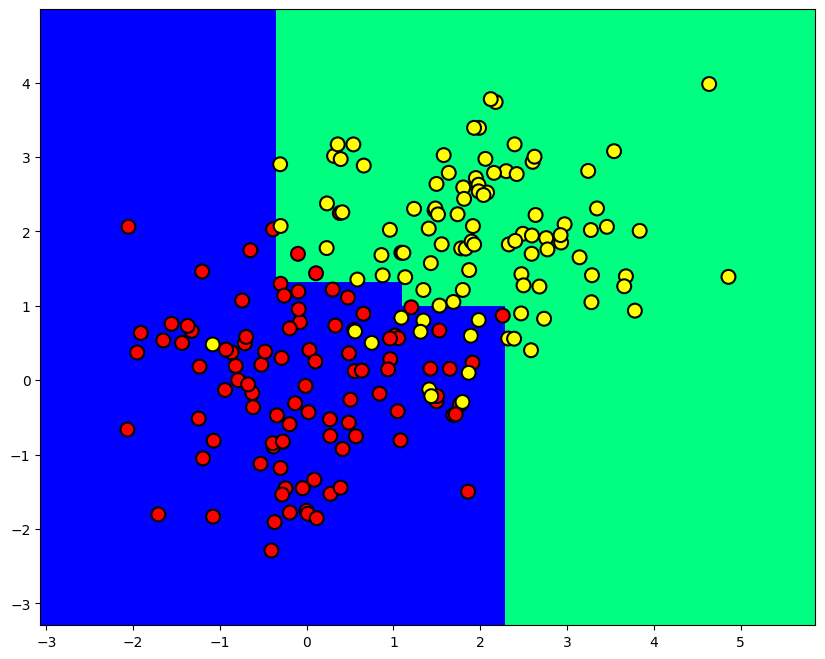

/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/pipeline.py", line 722, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/asav/

/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/pipeline.py", line 722, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/asav/

/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/pipeline.py", line 722, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/asav/

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='winter')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);


In [5]:
age = {'Возраст' : [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
       'Невозврат кредита' : [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]}
data = pd.DataFrame(data=age)
data2 = data
data2['Зарплата'] = [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88]

In [6]:
from sklearn.tree import export_graphviz

In [7]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Возраст'].values.reshape(-1, 1), data['Невозврат кредита'].values)

export_graphviz(age_tree, feature_names=['Возраст'], 
out_file='/Users/asav/Documents/notebooks/roman_practice/Open_Data_Science/age_tree.dot', filled=True)
!dot -Tpng '/Users/asav/Documents/notebooks/roman_practice/Open_Data_Science/age_tree.dot' -o '/Users/asav/Documents/notebooks/roman_practice/Open_Data_Science/age_tree.png'

In [8]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[['Возраст', 'Зарплата']].values, data2['Невозврат кредита'].values);

export_graphviz(age_sal_tree, feature_names=['Возраст', 'Зарплата'], 
out_file='/Users/asav/Documents/notebooks/roman_practice/Open_Data_Science/age_sal_tree.dot', filled=True)
!dot -Tpng '/Users/asav/Documents/notebooks/roman_practice/Open_Data_Science/age_sal_tree.dot' -o '/Users/asav/Documents/notebooks/roman_practice/Open_Data_Science/age_sal_tree.png'

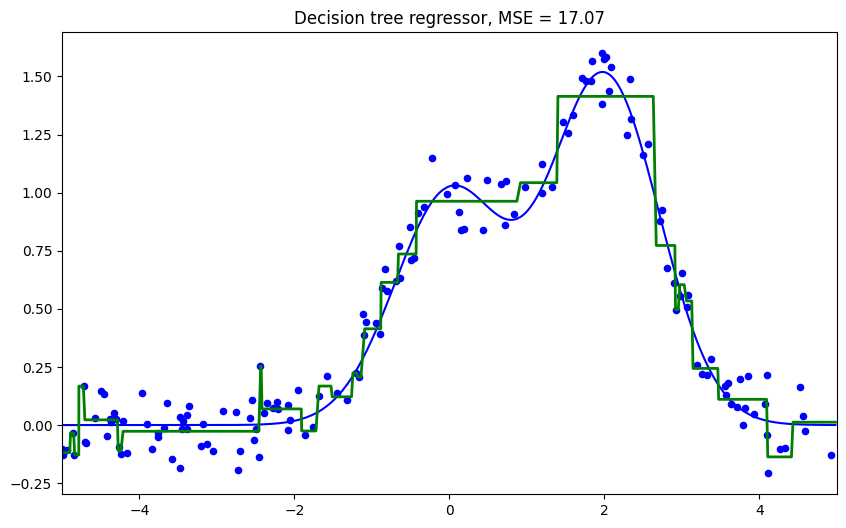

In [9]:
n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

Считаем данные в DataFrame и проведем предобработку. Штаты пока сохраним в отдельный объект Series, но удалим из датафрейма. Первую модель будем обучать без штатов, потом посмотрим, помогают ли они.

In [10]:
df = pd.read_csv('/Users/asav/Documents/notebooks/roman_practice/Open_Data_Science/telecom_churn.csv')

df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn'], axis=1, inplace=True)


Выделим 70% выборки (X_train, y_train) под обучение и 30% будут отложенной выборкой (X_holdout, y_holdout). отложенная выборка никак не будет участвовать в настройке параметров моделей, на ней мы в конце, после этой настройки, оценим качество полученной модели. Обучим 2 модели – дерево решений и kNN, пока не знаем, какие параметры хороши, поэтому наугад: глубину дерева берем 5, число ближайших соседей – 10.


In [11]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = LogisticRegression()#KNeighborsClassifier(n_neighbors=9)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)


X_train.shape, X_holdout.shape, y_train.shape, y_holdout.shape

((2333, 18), (1000, 18), (2333,), (1000,))

Качество прогнозов будем проверять с помощью простой метрики – доли правильных ответов. Сделаем прогнозы для отложенной выборки. Дерево решений справилось лучше: доля правильных ответов около 94% против 88% у kNN. Но это мы пока выбирали параметры наугад.


In [12]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred) 

0.94

In [13]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

0.873

Теперь настроим параметры дерева на кросс-валидации. Настраивать будем максимальную глубину и максимальное используемое на каждом разбиении число признаков. Суть того, как работает GridSearchCV: для каждой уникальной пары значений параметров max_depth и max_features будет проведена 5-кратная кросс-валидация и выберется лучшее сочетание параметров.

In [14]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [15]:
tree_params = {'max_depth': range(1,11),
'max_features': range(4,19)}

In [16]:
tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

In [17]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             verbose=True)

Лучшее сочетание параметров и соответствующая средняя доля правильных ответов на кросс-валидации:

In [18]:
tree_grid.best_params_

{'max_depth': 6, 'max_features': 17}

In [19]:
tree_grid.best_score_

0.94257014456259

In [20]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.946

Теперь попробуем настроить число соседей в алгоритме kNN.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [22]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

In [23]:
knn_params = {'knn__n_neighbors': range(1, 10)}

In [24]:
knn_grid = GridSearchCV(knn_pipe, knn_params,
cv=5, n_jobs=-1, verbose=True)

In [25]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/sklearn/pipeline.py", line 722, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/Users/a

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(1, 10)},
             verbose=True)

In [26]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 1}, nan)

In [27]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

AttributeError: 'NoneType' object has no attribute 'split'

В этом примере дерево показало себя лучше, чем метод ближайших соседей: 94.2% правильных ответов на кросс-валидации и 94.6% на отложенной выборке против 88.6% / 89% для kNN. Более того, в данной задаче дерево проявляет себя очень хорошо, и даже случайный лес (который пока представляем просто как кучу деревьев, которые вместе работают почему-то намного лучше, чем одно дерево) в этом примере показывает долю правильных ответов не намного выше (95.1% на кросс-валидации и 95.3% –на отложенной выборке), а обучается намного дольше.


In [28]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5))) 

0.9494233119813256


In [29]:
forest_params = {'max_depth': range(1,11),
'max_features': range(4,19)}

In [30]:
forest_grid = GridSearchCV(forest, forest_params,
cv=5, n_jobs=-1,
verbose=True)

In [31]:
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             verbose=True)

In [32]:
forest_grid.best_params_, forest_grid.best_score_ 

({'max_depth': 9, 'max_features': 6}, 0.9511372931045574)

In [33]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout))

0.953